In [2]:
# imports
#!pip install selenium
#!pip install webdriver_manager 

from bs4 import BeautifulSoup # For HTML parsing
import requests # Website connections
from time import sleep # To prevent overwhelming the server between connections
import pandas as pd # For converting results to a dataframe and bar chart plots
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

from matplotlib import pyplot as plt
%matplotlib inline

options = Options()
#driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options) #this works for Daniel but not for Alex or Colin
#driver = webdriver.Chrome('./chromedriver') # used by Colin/Alex 


## Pulling tables for each year from the website

In [3]:
years = list(range(2002,2023))

In [4]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

In [5]:
# loop is getting the webpage for each year of player stats and saving them 
# to a folder called we created (create the folder first before running this cell) and saved locally called, "player".
# This cell scrapes HTML data from website but NOT completely because of the Javascript on that web page. However, for Colin
# this code scraped the whole web page.
for year in years:
    
    url = player_stats_url.format(year)
    
    data = requests.get(url)
    
    with open("player/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)
        # may not need encoding="utf-8" but for Colin, the cell won't run without it

## Getting dataframe of each season's table

In [6]:
# creating a list of dataframes that is made up of each year's table of stats

dfs = []
for year in years:
    with open("player/{}.html".format(year)) as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser') #pass in html parser for page string 
    
    player_table = soup.find_all(id="per_game_stats")[0] # isolating per game stats tables 
    player_df = pd.read_html(str(player_table))[0] # need to pass as string.  produces list of df's
    player_df["Year"] = year #creating a column for year. 
    
    dfs.append(player_df)

    

## Creating one dataframe with all of the years from 2002-2022

In [7]:
players = pd.concat(dfs)

In [8]:
players.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Tariq Abdul-Wahad,SG,27,TOT,24,12,18.4,2.3,6.1,...,1.7,1.8,3.5,1.0,0.8,0.4,1.1,2.3,5.6,2002
1,1,Tariq Abdul-Wahad,SG,27,DEN,20,12,20.9,2.8,7.3,...,2.0,2.0,3.9,1.1,0.9,0.5,1.2,2.6,6.8,2002
2,1,Tariq Abdul-Wahad,SG,27,DAL,4,0,6.0,0.0,0.5,...,0.5,1.0,1.5,0.5,0.5,0.3,0.8,1.3,0.0,2002
3,2,Shareef Abdur-Rahim,PF,25,ATL,77,77,38.7,7.8,16.8,...,2.6,6.5,9.0,3.1,1.3,1.1,3.2,2.8,21.2,2002
4,3,Courtney Alexander,SG,24,WAS,56,28,23.7,4.0,8.5,...,0.8,1.9,2.6,1.5,0.6,0.1,1.1,2.0,9.8,2002
5,4,Victor Alexander,C,32,DET,15,0,6.5,1.2,3.4,...,0.5,1.5,1.9,0.4,0.0,0.1,0.3,0.4,2.7,2002
6,5,Malik Allen,PF,23,MIA,12,2,13.4,1.8,4.3,...,1.3,1.9,3.2,0.4,0.3,0.7,0.2,1.3,4.3,2002
7,6,Ray Allen*,SG,26,MIL,69,67,36.6,7.7,16.6,...,1.2,3.3,4.5,3.9,1.3,0.3,2.3,2.3,21.8,2002
8,7,Rafer Alston,PG,25,MIL,50,7,12.0,1.3,3.8,...,0.2,1.2,1.4,2.9,0.6,0.0,0.8,0.8,3.5,2002
9,8,John Amaechi,PF,31,UTA,54,0,10.9,1.0,3.1,...,1.0,1.1,2.0,0.5,0.1,0.2,1.0,1.2,3.2,2002


## Creating a csv file from the dataframe

In [9]:
players.to_csv("players.csv", index = False)

In [3]:
players = pd.read_csv("players.csv")

In [4]:
players.head()

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Tariq Abdul-Wahad,SG,27,TOT,24,12,18.4,2.3,...,1.7,1.8,3.5,1.0,0.8,0.4,1.1,2.3,5.6,2002
1,1,1,Tariq Abdul-Wahad,SG,27,DEN,20,12,20.9,2.8,...,2.0,2.0,3.9,1.1,0.9,0.5,1.2,2.6,6.8,2002
2,2,1,Tariq Abdul-Wahad,SG,27,DAL,4,0,6.0,0.0,...,0.5,1.0,1.5,0.5,0.5,0.3,0.8,1.3,0.0,2002
3,3,2,Shareef Abdur-Rahim,PF,25,ATL,77,77,38.7,7.8,...,2.6,6.5,9.0,3.1,1.3,1.1,3.2,2.8,21.2,2002
4,4,3,Courtney Alexander,SG,24,WAS,56,28,23.7,4.0,...,0.8,1.9,2.6,1.5,0.6,0.1,1.1,2.0,9.8,2002


## Using selenium to grab full pages of stats from the web browser

In [12]:
for year in years: # iterates through all the years 2002 to 2022
    url = player_stats_url.format(year)
    
    driver.get(url) # tell the webdriver to get the webpage
    driver.execute_script("window.scrollTo(1,10000)") 
    # "window.scrollTo(1,10000)" is a Javascript command tells the Selenium browser to scroll down and render the
    # rest of the table so we can scrape the whole web page
    time.sleep(2) # Adds 2 second delay in the execution of this cell
    
    html = driver.page_source # tells the driver to grab the HTML data
    
    with open("player/{}.html".format(year), "w+", encoding="utf-8") as f: # "w+" means opening the HTML in write mode.
        # may not need encoding="utf-8" but for Colin, the cell won't run without it
        f.write(html) # write to an HTML file

## Again creating list of data frames from selenium pages and concatinating them

In [13]:
dfs = [] # initialise a list of dataframes

for year in years: # iterates through all the years 2002 to 2022
    with open("player/{}.html".format(year)) as f:
        page = f.read() # opens HTML file in read mode
    
    soup = BeautifulSoup(page, 'html.parser') # passing in page string into the html parser
    for header in soup.find_all('tr', class_='thead'): # finding all elements 'tr' with class 'thead' 
        header.decompose() # removes unnecessary reapeated header 

    
    player_table = soup.find(id="per_game_stats") # Searching for id: per_game_stats
    player = pd.read_html(str(player_table))[0] # Reading the HTML table into Pandas
    player["Year"] = year # assigns "Year" column to each row
    
    dfs.append(player) # appending player data to dataframe list 'dfs' 

In [14]:
players = pd.concat(dfs) # concatenating list of df's together to make one dataframe

In [16]:
# writing to a csv, run first cell if Pandas not imported 

players.to_csv("players.csv")
# saves csv file in the same folder as the notebook 
# If we need to go back and run the notebook again we don't need to run all cells again

## Using Pandas to read the csv file

In [5]:
player_data = pd.read_csv("players.csv")

In [6]:
player_data.dtypes

Unnamed: 0      int64
Rk              int64
Player         object
Pos            object
Age             int64
Tm             object
G               int64
GS              int64
MP            float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
TOV           float64
PF            float64
PTS           float64
Year            int64
dtype: object

In [7]:
player_data.head()

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Tariq Abdul-Wahad,SG,27,TOT,24,12,18.4,2.3,...,1.7,1.8,3.5,1.0,0.8,0.4,1.1,2.3,5.6,2002
1,1,1,Tariq Abdul-Wahad,SG,27,DEN,20,12,20.9,2.8,...,2.0,2.0,3.9,1.1,0.9,0.5,1.2,2.6,6.8,2002
2,2,1,Tariq Abdul-Wahad,SG,27,DAL,4,0,6.0,0.0,...,0.5,1.0,1.5,0.5,0.5,0.3,0.8,1.3,0.0,2002
3,3,2,Shareef Abdur-Rahim,PF,25,ATL,77,77,38.7,7.8,...,2.6,6.5,9.0,3.1,1.3,1.1,3.2,2.8,21.2,2002
4,4,3,Courtney Alexander,SG,24,WAS,56,28,23.7,4.0,...,0.8,1.9,2.6,1.5,0.6,0.1,1.1,2.0,9.8,2002


## Combining duplicate records of players 

In [8]:
def single_team(df):
    if df.shape[0]==1: # if there's only one row of stats for a player, then just return that row of data
        return df
    else:
        row = df[df["Tm"]=="TOT"] # "TOT" is NOT a team name. It represents the Total stats for the player that year.
        row["Tm"] = df.iloc[-1,:]["Tm"] # Use only the last team the player played for in the year. The team in the last row.
        return row

player_data = player_data.groupby(["Player", "Year"]).apply(single_team) # group by player and year

In [9]:
player_data.head()

Unnamed: 0   Rk        Player Pos  Age   Tm   G  GS  \
Player       Year                                                             
A.J. Guyton  2002 179          179  160   A.J. Guyton  PG   23  CHI  45   6   
             2003 666          166  146   A.J. Guyton  PG   24  GSW   2   0   
A.J. Hammons 2017 8785         209  171  A.J. Hammons   C   24  DAL  22   0   
A.J. Price   2010 4844         435  335    A.J. Price  PG   23  IND  56   2   
             2011 5452         465  339    A.J. Price  PG   24  IND  50   0   

                          MP   FG  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Player       Year                  ...                                      
A.J. Guyton  2002 179   13.5  2.0  ...  0.3  0.7  1.0  1.8  0.2  0.2  0.8   
             2003 666    4.5  0.0  ...  0.0  0.0  0.0  1.0  0.5  0.0  0.5   
A.J. Hammons 2017 8785   7.4  0.8  ...  0.4  1.3  1.6  0.2  0.0  0.6  0.5   
A.J. Price   2010 4844  15.4  2.6  ...  0.2  1.4  1.6  1.9  0.6  0.1  1.1   
             2011 5452  15.9  2.3  ...  0.3  1.1  1.4  2.2  0.6  0.0  1.1   

                         PF  PTS  Year  
Player       Year                       
A.J. Guyton  2002 179   0.5  5.4  2002  
             2003 666   0.0  0.0  2003  
A.J. Hammons 2017 8785  1.0  2.2  2017  
A.J. Price   2010 4844  0.9  7.3  2010  
             2011 5452  1.2  6.5  2011  

[5 rows x 32 columns]

In [10]:
player_data.index = player_data.index.droplevel() # need cell to get rid of the extra 'Player' column

In [11]:
player_data.index = player_data.index.droplevel() # need cell to get rid of the extra 'Year' column

## Mean of Blocks per player per season

In [12]:
blocks = player_data.groupby("Year")["BLK"].mean()

In [13]:
blocks

Year
2002    0.448182
2003    0.433645
2004    0.417195
2005    0.413362
2006    0.396725
2007    0.390393
2008    0.414667
2009    0.435214
2010    0.428281
2011    0.422788
2012    0.426569
2013    0.423769
2014    0.392917
2015    0.387195
2016    0.415126
2017    0.392593
2018    0.370185
2019    0.391321
2020    0.399055
2021    0.415000
2022    0.369587
Name: BLK, dtype: float64

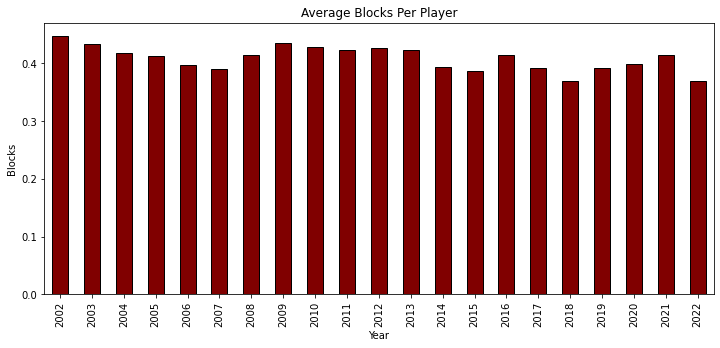

In [14]:
blocks.plot.bar('Year', 'BLK', figsize = (12, 5), color = 'maroon', ec = 'black');
plt.title ('Average Blocks Per Player');
plt.ylabel("Blocks");


## Mean of Steals per player per season

In [15]:
steals = player_data.groupby("Year")["STL"].mean()

In [16]:
steals

Year
2002    0.668864
2003    0.672430
2004    0.669231
2005    0.646336
2006    0.603493
2007    0.616594
2008    0.618667
2009    0.630926
2010    0.625113
2011    0.619912
2012    0.655649
2013    0.643255
2014    0.634167
2015    0.648577
2016    0.653361
2017    0.625309
2018    0.617222
2019    0.617736
2020    0.621928
2021    0.617778
2022    0.606777
Name: STL, dtype: float64

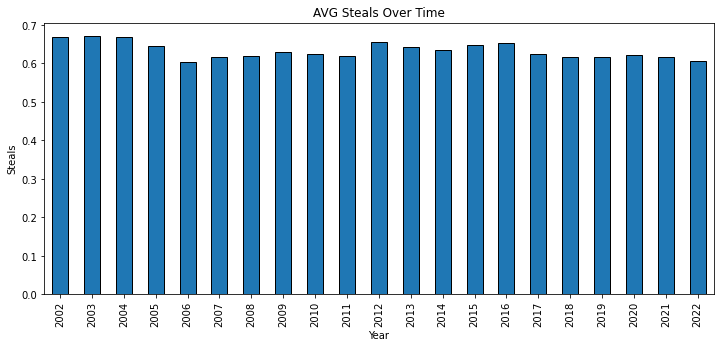

In [17]:
steals.plot.bar('Year', 'STL', figsize = (12, 5), ec = 'black')
plt.xlabel("Year") 
plt.ylabel("Steals")
plt.title("AVG Steals Over Time");

## Mean of defensive rebounds per player per season

In [18]:
def_rebounds = player_data.groupby("Year")["DRB"].mean()

def_rebounds


Year
2002    2.578864
2003    2.549533
2004    2.546606
2005    2.538147
2006    2.534498
2007    2.540830
2008    2.610889
2009    2.647630
2010    2.675113
2011    2.607965
2012    2.601046
2013    2.580086
2014    2.627292
2015    2.651423
2016    2.754832
2017    2.715226
2018    2.613148
2019    2.776038
2020    2.796975
2021    2.817222
2022    2.622149
Name: DRB, dtype: float64

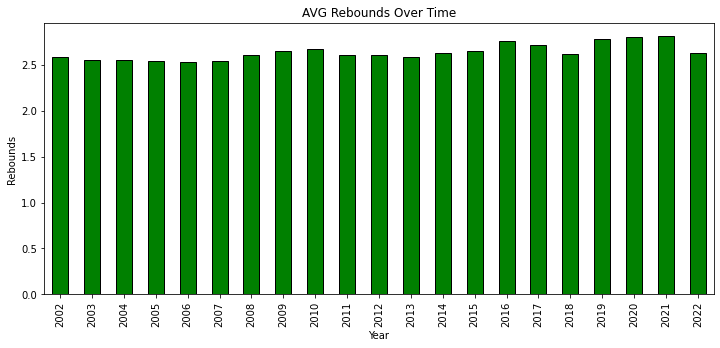

In [19]:
def_rebounds.plot.bar('Year', 'DRB', figsize = (12, 5), color = 'green', ec = 'black');
plt.xlabel("Year") 
plt.ylabel("Rebounds")
plt.title("AVG Rebounds Over Time");



## Correlation Analysis

In [20]:
corr_BLK_STL = player_data['BLK'].corr(player_data['STL'])
corr_BLK_STL

0.18742270658855484

In [21]:
corr_BLK_DRB = player_data['BLK'].corr(player_data['DRB'])
corr_BLK_DRB

0.6554559706330938

In [22]:
corr_STL_DRB = player_data['STL'].corr(player_data['DRB'])
corr_STL_DRB

0.48741542007836874

In [23]:
Steals = player_data[['STL', 'Year', 'DRB', 'BLK']] #subsetting dataframe 
Steals_Agg = Steals.groupby(['Year'])[['STL', 'DRB', 'BLK']].mean() #grouping by year and taking mean of each metric 
Steals_Agg

,STL,DRB,BLK
Year,,,
2002,0.668864,2.578864,0.448182
2003,0.672430,2.549533,0.433645
2004,0.669231,2.546606,0.417195
2005,0.646336,2.538147,0.413362
2006,0.603493,2.534498,0.396725
2007,0.616594,2.540830,0.390393
2008,0.618667,2.610889,0.414667
2009,0.630926,2.647630,0.435214
2010,0.625113,2.675113,0.428281


In [24]:
a = Steals_Agg.corr()
a

,STL,DRB,BLK
STL,1.000000,-0.281370,0.595874
DRB,-0.281370,1.000000,-0.153055
BLK,0.595874,-0.153055,1.000000


<AxesSubplot:>

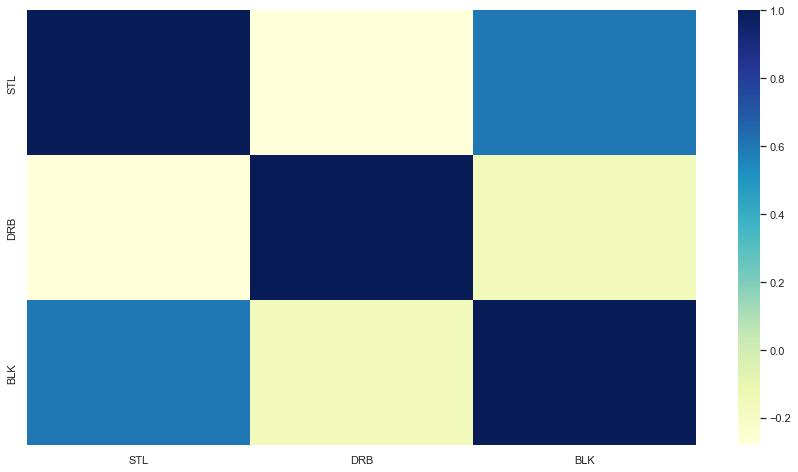

In [25]:
import seaborn as sns 
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(a, cmap="YlGnBu") #creating heatmap to viz correlation between variables of interest 

## Analysing Combined Defensive Metric Trends

In [66]:
#resetting index and naming column Year 
Steals_Agg.reset_index(inplace=True)
Steals_Agg.rename(columns={'index':'Year'})


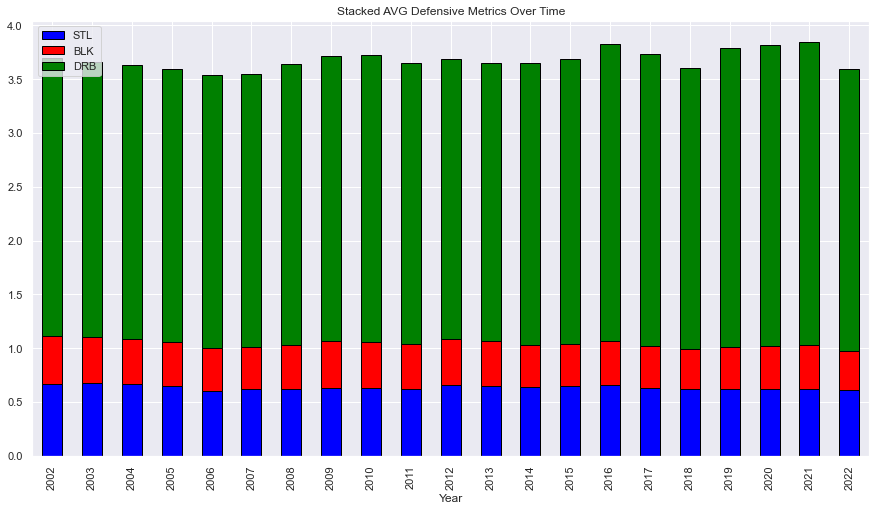

In [88]:
stack = Steals_Agg.plot(x = 'Year', y =['STL', 'BLK', 'DRB'], kind = 'bar', stacked = True, color = ['blue', 'red', 'green'], ec = 'black')
stack.legend(loc = 'upper left')
plt.title("Stacked AVG Defensive Metrics Over Time");